In [1]:
import time
import numpy as np
from math import pi
from scipy import optimize
import matplotlib.pyplot as plt

N, N_k= 20, 10 #Select the number of points given to calculated the approximated integral in each dimension
               #(N_k refers to number of Matsubara frequencies)

def integral_1r(m): #Tadpole integral
    
    def g_1(k,w):
        return 1/(2*pi)**2*1/(w**2+4*np.sin(k/2)**2+m) 
    
    v1=np.repeat(np.linspace(-pi,pi,N_k),2*N)
    v2=np.tile(np.linspace(-2*pi*T*N,2*pi*T*N,2*N),N_k)
    
    return sum(g_1(v1,v2))*(2*pi*T)*(2*pi/N_k)

def integral_2r(m): #Sunrise integral
    
    def g_2(k1,k2,w1,w2):
        return 1/(2*pi)**4*1/((w1**2+4*np.sin(k1/2)**2+m)*(w2**2+4*np.sin(k2/2)**2+m)*((w1+w2)**2+(2*np.sin(k1/2)+2*np.sin(k2/2))**2+m))
    
    b1=np.repeat(np.linspace(-pi,pi,N_k),N_k*(2*N)*(2*N))
    b2=np.tile(np.repeat(np.linspace(-pi,pi,N_k),(2*N)*(2*N)),N_k)
    b3=np.tile(np.repeat(np.linspace(-2*pi*T*N,2*pi*T*N,2*N),(2*N)),N_k*N_k) 
    b4=np.tile(np.linspace(-2*pi*T*N,2*pi*T*N,2*N),(2*N)*N_k*N_k) 
    
    return sum(g_2(b1,b2,b3,b4))*(2*pi*T)*(2*pi*T)*(2*pi/N_k)*(2*pi/N_k)
    
def integral_3r(m): #Coupling costant renormalisation
    def g_3(k,w):
        return 1/(2*pi)**2*1/(w**2+4*np.sin(k/2)**2+m)**2
    v1=np.repeat(np.linspace(-pi,pi,N_k),2*N)
    v2=np.tile(np.linspace(-2*pi*T*N,2*pi*T*N,2*N),N_k)
    
    return sum(g_3(v1,v2))*(2*pi*T)*(2*pi/N_k)

#Self-consistenet equations to second order in loop expansion

def ecuacion_1r(m):
    return m-(lambd/2)*integral_1r(m)

def ecuacion_2r(m):
    return -mr2+m-(lambd**2/6)*integral_2r(m)

def lambda_bare(m):
    return lambd+(3*lambd**2/2)*integral_3r(m)
    
#m_r1=optimize.newton(ecuacion_2r,m0,tol=1e-2,full_output=True)

Critical line plots

0
0.007078186492357993
0.03831898625483375
0.07378884754731069
0.11053195312924341
0.146536050084555
0.18544675524691853
0.22373144667257217
0.2611343159412096
0.29911831472096917
0.3364806169730036
0.373568598260504
0.41030140981188207
0.447700349603344
0.4843238627797094
0.5207156011299072
0.5568583576863442
0.592731144929491
0.6289151344311515
0.6645367228933884
0.6999524222195026


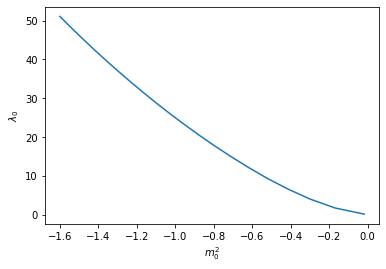

In [2]:
index_lambdas=20
index_mr2=10

T=0.1 #select the temperature
lambdas=np.linspace(0.1,15,index_lambdas)
m0=0.1 #educated guess
MR2=[0] #MR2=linspace(0.0001,2,index_mr2) for values of mr2 which are not in the critical region
m_0C,lambda_0 =np.empty([index_lambdas,index_mr2]), np.empty([index_lambdas,index_mr2])

k,l=0,0
for mr2 in MR2:
    print(k)
    for lambd in lambdas:
        m_r1=optimize.newton(ecuacion_2r,m0,tol=1e-2)
        print(m_r1)
        m_0C[l,k]=ecuacion_1r(m_r1)
        lambda_0[l,k]=lambda_bare(m_r1)
        l+=1
    k+=1
    l=0
    
plt.plot(m_0C[:,0], lambda_0[:,0]) #Change the array index if more than one mr2 values are given
plt.xlabel('$m_0^{2}$')
plt.ylabel('$\lambda_0$')
plt.show()

Contour plots

In [3]:
index_lambdas=10 #select the number of points accoirding to the dessired precission
index_mr2=5
index_T=5

lambdas=np.linspace(0.01,15,index_lambdas)
MR2=np.linspace(0.0001,2,index_mr2) #MR2=[0]
t=np.linspace(0,0.3,index_T)

m_0C,lambda_0 = np.empty([index_lambdas,index_mr2,index_T]), np.empty([index_lambdas,index_mr2,index_T])

k, l, j= 0, 0, 0
iteraciones=0

startTime = time.time()
for T in t:
    for mr2 in MR2:
        m0=mr2
        for lambd in lambdas:
            print('Completed (%):',100*iteraciones/(index_lambdas*index_mr2*index_T),end='\r')
            m_r1=optimize.newton(ecuacion_2r,m0,tol=1e-2)
            m0=m_r1
            m_0C[l,k,j]=ecuacion_1r(m_r1)
            lambda_0[l,k,j]=lambda_bare(m_r1)
            iteraciones+=1
            l+=1
        k+=1
        l=0
    j+=1
    k=0

executionTime=(time.time()-startTime)
print('Execution time:' ,executionTime)

Execution time: 15.878720998764038


In [4]:
lambda_fijo=15 #select the dessired lambda value to generate a contourplot from the previous grid
m_0C_new, MR2_new, t_new= np.empty([index_mr2,index_T]), np.empty([index_mr2,index_T]), np.empty([index_mr2,index_T])

for i in range(index_mr2):
    for j in range(index_T):
        diferencias=abs(lambda_0[:,i,j]-lambda_fijo)
        index_lambda_fijo=np.where(diferencias==min(diferencias))
        m_0C_new[i,j]=m_0C[index_lambda_fijo,i,j]
    MR2_new[i,:]= MR2[i]#1/MR2[i]

for i in range(index_T):
    t_new[:,i]=t[i]
    
%matplotlib qt
plt.contourf(m_0C_new,t_new,MR2_new,100,cmap="plasma")
plt.xlabel('$m_0^{2}$')
plt.ylabel('$T$')
#plt.xlim()
#plt.ylim()
plt.grid()
cbar=plt.colorbar()
cbar.set_label('${m_{R2}}^2$')